<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Regress%C3%A3o_Linear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ficha Técnica Disciplina - Data mining.

Conteúdo - Regressão Linear

Autores:

Anderson Borba (anderson.borba@mackenzie.br) e anderson.aborba@professores.ibmec.edu.br

Luiz Barboza (luiz.cbjunior@professores.ibmec.edu.br).

Sítio eletrônico
https://quant-ibmec.group/


# Regressão linear
## Importando a base de dados

In [ ]:
import pandas as pd
nts = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
print(nts)

     AP1   AP2   AP3  Final
0   10.0  10.0   9.0   9.80
1    9.0  10.0   9.0   9.40
2    9.5  10.0  10.0   9.80
3    9.4   9.9   9.9   9.70
4    9.3   9.8   9.8   9.60
5    9.2   9.7   9.7   9.50
6    9.1   9.6   9.6   9.40
7    9.0   9.5   9.5   9.30
8   10.0   7.0   5.0   7.80
9    9.0   6.0   4.0   6.80
10   9.5   6.5   4.5   7.30
11   9.4   6.4   4.4   7.20
12   9.3   6.3   4.3   7.10
13   9.2   6.2   4.2   7.00
14   9.1   6.1   4.1   6.90
15   9.0   6.0   4.0   6.80
16   5.2   5.2   4.2   5.00
17   5.1   5.1   4.1   4.90
18   5.0   5.0   4.0   4.80
19   4.9   4.9   3.9   4.70
20   4.8   4.8   3.8   4.60
21   4.7   4.7   3.7   4.50
22   4.6   4.6   3.6   4.40
23   4.5   4.5   3.5   4.30
24   4.0   4.0   4.0   4.00
25   5.0   5.0   5.0   5.00
26   4.5   4.5   4.5   4.50
27   5.5   5.5   5.5   5.50
28   5.0   9.0  10.0   7.60
29   5.1   9.5  10.0   7.84
30   5.2   9.5  10.0   7.88
31   5.3   9.5  10.0   7.92
32   5.4   9.5  10.0   7.96
33   5.5   9.5  10.0   8.00
34   4.9   9.0  10.0

# A média foi gerada com a seguinte fórmula:
$$Final = 0.4 * AP1 + 0.4 * AP2 + 0.2 * AP3 $$

# Ideias teóricas sobre regressão linear
Vamos apresentar os conceitos de regressão linear para um conjunto de dados definidos como segue.
## Ideia 1
### Dados tabelados
Vamos montar o conjunto de dados como mostra a tabela abaixo.

\begin{array}{c} \hline
x & y \\ \hline
x_1 & y_1  \\
x_2 & y_2 \\
x_3 & y_3  \\
x_4 & y_4  \\
x_5 & y_5  \\
 \hline
\end{array}


Assim, vamos aplicar a reta $y = ax+b$, observe que os parâmetros a ser encontrados são $(a, b)$, respectivamente o coeficiente angular e o coeficiente linear da reta. Teremos então,

\begin{array}{c} \hline
y = ax+b \\ 
 \hline\hline
 y_1= ax_1+b \\ 
 y_2= ax_2+b\\
 y_3= ax_3+b \\
 y_4= ax_4+b  \\
 y_5= ax_5+b \\
 \hline
\end{array}

## Representaçao matricial
Os dados acima podem ser representados da seguinte forma:
$$
  \left[ \begin{array}{cc}
   x_1 & 1 \\
   x_2 & 1 \\
   x_3 & 1 \\
   x_4 & 1 \\
   x_5 & 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      y_1 \\
      y_2\\
      y_3\\
      y_4\\
      y_5\\
   \end{array}\right]. 
$$ 

Definindo,
$$
  M=\left[ \begin{array}{cc}
   x_1 & 1 \\
   x_2 & 1 \\
   x_3 & 1 \\
   x_4 & 1 \\
   x_5 & 1 \\
  \end{array}  \right],
 v=\left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right],
   y=\left[\begin{array}{c}
      y_1 \\
      y_2\\
      y_3\\
      y_4\\
      y_5\\
   \end{array}\right] 
$$ 

$$Mv=y$$
Tomando o sistema linear como base, e multiplicando os dois lados pela matriz $M$ transposta.
$$M^TMv=M^Ty$$
$$
\left[ \begin{array}{ccccc}
   x_1 & x_2 & x_3 & x_4&  x_5\\
     1 &   1 &   1 &   1&    1\\
  \end{array}  \right]
  \left[ \begin{array}{cc}
   x_1 & 1 \\
   x_2 & 1 \\
   x_3 & 1 \\
   x_4 & 1 \\
   x_5 & 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[ \begin{array}{ccccc}
   x_1 & x_2 & x_3 & x_4&  x_5\\
     1 &   1 &   1 &   1&    1\\
  \end{array}  \right]
   \left[\begin{array}{c}
      y_1 \\
      y_2\\
      y_3\\
      y_4\\
      y_5\\
   \end{array}\right] 
$$

Gerando o sistema linear,
$$
  \left[ \begin{array}{cc}
   \sum_{i=1}^{5}x_i^2 & \sum_{i=1}^{5}x_i \\
   \sum_{i=1}^{5}x_i& \sum_{i=1}^{5} 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      \sum_{i=1}^{5}x_iy_i \\
      \sum_{i=1}^{5} y_i\\
   \end{array}\right] 
$$

Definido por,
$$\overline{M}v=\bar{y}$$
onde 
$$\overline{M} = \left[ \begin{array}{cc}
   \sum_{i=1}^{5}x_i^2 & \sum_{i=1}^{5}x_i \\
   \sum_{i=1}^{5}x_i& \sum_{i=1}^{5} 1 \\
  \end{array}  \right]$$
e
$$\bar{y}=\left[\begin{array}{c}
      \sum_{i=1}^{5}x_iy_i \\
      \sum_{i=1}^{5} y_i\\
   \end{array}\right]$$

Resolvendo o sistema linear por eliminação de Gauss.
\begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  a_{12}& \overline{y_1}\\
        a_{21}&   a_{22}& \overline{y_2}\\
    \end{array}
    \right].
\end{equation}

Iniciaremos com a operação por linha,
$L_2=>L_2-\frac{a_{21}}{a_{11}}L_1$
  \begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  a_{12}& \overline{y_1}\\
        0      &  a_{22}-\frac{a_{21}a_{12}}{a_{11}} &\overline{y_2}-\frac{a_{21}\overline{y_1}}{a_{11}}\\
    \end{array}
    \right]
\end{equation}
    \begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  a_{12}& \overline{y_1}\\
        0      &  \frac{a_{22}a_{11}-a_{21}a_{12}}{a_{11}} &\frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{11}}\\
    \end{array}
    \right]
\end{equation}
Realizando a seguinte operação por linha teremos,

$L_1=>L_1-\frac{a_{11}a_{12}}{a_{22}a_{11}-a_{21}a_{12}}L_2$

\begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        a_{11} &  0                                       & \frac{a_{22}a_{11}\overline{y_1}-a_{12}a_{11}\overline{y_2}}{a_{22}a_{11}-a_{21}a_{12}}\\
        0      &  \frac{a_{22}a_{11}-a_{21}a_{12}}{a_{11}} &\frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{11}}\\
    \end{array}
    \right].
\end{equation}

E por fim, para finalizar a forma escalonada,

$L_1=>\frac{1}{a_{11}}L_1$

$L_2=>\frac{a_{11}}{a_{22}a_{11}-a_{21}a_{12}}L_2$

\begin{equation}\nonumber
    \left[
    \begin{array}{rr|r}
        1 &  0                                       & \frac{a_{22}\overline{y_1}-a_{12}\overline{y_2}}{a_{22}a_{11}-a_{21}a_{12}}\\
        0      &  1&\frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{22}a_{11}-a_{21}a_{12}}\\
    \end{array}
    \right]
\end{equation}
Desta forma podemos encontrar $(a,b)$,
 \begin{array}{ccc}
   a &=& \frac{a_{22}\overline{y_1}-a_{12}\overline{y_2}}{a_{22}a_{11}-a_{21}a_{12}} \\
   b &=& \frac{a_{11}\overline{y_2}-a_{21}\overline{y_1}}{a_{22}a_{11}-a_{21}a_{12}} \\
  \end{array}  

Resumindo o problema de regressão linear para a base de dados definida acima,
$$
  \left[ \begin{array}{cc}
   \sum_{i=1}^{5}x_i^2 & \sum_{i=1}^{5}x_i \\
   \sum_{i=1}^{5}x_i& \sum_{i=1}^{5} 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      \sum_{i=1}^{5}x_iy_i \\
      \sum_{i=1}^{5} y_i\\
   \end{array}\right] 
$$
encontramos os parâmetros$ (a,b)$
$$
  \begin{array}{ccc}
   a &=& \frac{5\sum_{i=1}^{5}x_iy_i-\sum_{i=1}^{5}x_i\sum_{i=1}^{5} y_i}{5\sum_{i=1}^{5}x_i^2-\left(\sum_{i=1}^{5}x_i\right)^2} 
   \end{array}
   $$
   $$
     \begin{array}{ccc}
   b &=& \frac{\sum_{i=1}^{5}x_i^2\sum_{i=1}^{5} y_i-\sum_{i=1}^{5}x_i\sum_{i=1}^{5}x_iy_i}{5\sum_{i=1}^{5}x_i^2-\left(\sum_{i=1}^{5}x_i\right)^2} 
  \end{array}  
  $$

Se a base de dados tem $n$ linha podemos usar,
\begin{array}{ccc}
   a &=& \frac{n\sum_{i=1}^{n}x_iy_i-\sum_{i=1}^{n}x_i\sum_{i=1}^{n} y_i}{n\sum_{i=1}^{n}x_i^2-\left(\sum_{i=1}^{n}x_i\right)^2} 
   \end{array}
     \begin{array}{ccc}
   b &=& \frac{\sum_{i=1}^{n}x_i^2\sum_{i=1}^{n} y_i-\sum_{i=1}^{n}x_i\sum_{i=1}^{n}x_iy_i}{n\sum_{i=1}^{n}x_i^2-\left(\sum_{i=1}^{n}x_i\right)^2} 
  \end{array} 

### Ideia 2
Seja a base de dados 
\begin{array}{c} \hline
x & y \\ \hline
x_1 & y_1  \\
x_2 & y_2 \\
x_3 & y_3  \\
x_4 & y_4  \\
x_5 & y_5  \\
 \hline
\end{array}


O $\hat{y_i}=a x_i + b$ é uma previsão linear (estimativa) para valores $y_i$, então podemos calcular o erro (desvio) $d_i= y_i-\hat{y_i}$, para todas as linha $i$ da base de dados. 
\begin{array}{c} \hline
x & y& \hat{y_i}&d_i \\ \hline
x_1 & y_1&\hat{y_1}&d_1  \\
x_2 & y_2&\hat{y_2}&d_2 \\
x_3 & y_3&\hat{y_3}&d_3  \\
x_4 & y_4&\hat{y_4}&d_4  \\
x_5 & y_5&\hat{y_5}&d_5  \\
 \hline
\end{array}


Esta ideia para o método de regressão linear surge no seguinte contexto: Encontrar o valor mínimo para $\sum_{i=1}^{n}d_i^2$, portanto vamos definir o problema desta maneira. 
\begin{equation*}
\begin{aligned}
& \underset{a,b}{\text{minimize}}
& \sum_{i=1}^{n}d_i^2(a,b) & \\
\end{aligned}
\end{equation*}
Temos que encontrar o ponto crítico para a função $d_i^2(a,b)$, onde as variáveis são (a, b).
\begin{equation*}
\begin{aligned}
\frac{\partial}{\partial a}\sum_{i=1}^{n}(y_i-ax_i-b)^2& = & 0\\
\frac{\partial}{\partial a}\sum_{i=1}^{n}(y_i-ax_i-b)^2& = & 0\\
\end{aligned}
\end{equation*}
Derivando a equação teremos,
\begin{equation*}
\begin{aligned}
\sum_{i=1}^{n}2(y_i-ax_i-b)(-x_i)& = & 0\\
\sum_{i=1}^{n}2(y_i-ax_i-b)(-1)& = & 0\\
\end{aligned}
\end{equation*}
reescrevendo as equações
\begin{equation*}
\begin{aligned}
\Bigl(\sum_{i=1}^{n}x_i^2\Bigl)a + \Bigl(\sum_{i=1}^{n}x_i\Bigl)b& = & \sum_{i=1}^{n}x_iy_i\\
\Bigl(\sum_{i=1}^{n}x_i\Bigl)a + \Bigl(\sum_{i=1}^{n}1\Bigl)b& = & \sum_{i=1}^{n}y_i\\
\end{aligned}
\end{equation*}

Resultando no mesmo o sistema linear, pois as abordagens são equivalentes.
$$
  \left[ \begin{array}{cc}
   \sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i \\
   \sum_{i=1}^{n}x_i& \sum_{i=1}^{n} 1 \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      \sum_{i=1}^{n}x_iy_i \\
      \sum_{i=1}^{n} y_i\\
   \end{array}\right] 
$$

### Manipulações algébricas interessante.
A equação pode ser reescrita por:
$$
  \left[ \begin{array}{cc}
   \sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i \\
   \sum_{i=1}^{n}x_i& n \\
  \end{array}  \right]
 \left[\begin{array}{c}
       a\\
       b\\
   \end{array}\right]=
   \left[\begin{array}{c}
      \sum_{i=1}^{n}x_iy_i \\
      \sum_{i=1}^{n} y_i\\
   \end{array}\right] 
$$
e, usando a segunda equação obtemos $b$,
$$
  \begin{array}{cccccc}
   \Biggl(\sum_{i=1}^{n}x_i \Biggl)a&+& n b& = &\sum_{i=1}^{n} y_i \\
   b & = &\frac{1}{n}\sum_{i=1}^{n} y_i &-&\Biggl(\frac{1}{n}\sum_{i=1}^{n}x_i \Biggl)a\\
  \end{array} 
$$
lembrando a definição de média:

$$\begin{array}{c}
      \mu_X = \frac{1}{n}\sum_{i=1}^{n}x_i \\
      \mu_Y = \frac{1}{n}\sum_{i=1}^{n}y_i\\
   \end{array}
$$
então, 
$$
  \begin{array}{cccccc}
     b & = &\mu_Y &-&\mu_X a.\\
  \end{array} 
$$

Agora vamos subistituir esta igualdade na primeira equação do sistema linear,
\begin{equation*}
\begin{aligned}
\Bigl(\sum_{i=1}^{n}x_i^2\Bigl)a + \Bigl(\sum_{i=1}^{n}x_i\Bigl)b& = & \sum_{i=1}^{n}x_iy_i\\
\Bigl(\sum_{i=1}^{n}x_i^2\Bigl)a + \Bigl(\sum_{i=1}^{n}x_i\Bigl)\Bigl(\mu_Y -\mu_X a\Bigl)& = & \sum_{i=1}^{n}x_iy_i\\
\Bigl(\sum_{i=1}^{n}x_i^2\Bigl)a + \Bigl(\sum_{i=1}^{n}x_i\Bigl)\mu_Y -\Bigl(\sum_{i=1}^{n}x_i\Bigl)\mu_X a& = & \sum_{i=1}^{n}x_iy_i\\
\Bigl(\sum_{i=1}^{n}x_i^2-\mu_X\sum_{i=1}^{n}x_i\Bigl)a + \mu_Y\sum_{i=1}^{n}x_i & = & \sum_{i=1}^{n}x_iy_i\\
\Bigl(\sum_{i=1}^{n}x_i^2-\mu_X\sum_{i=1}^{n}x_i\Bigl)a & = & \sum_{i=1}^{n}x_iy_i - \mu_Y\sum_{i=1}^{n}x_i \\
\end{aligned}
\end{equation*}
Então 
\begin{equation*}
\begin{aligned}
a & = & \frac{\sum_{i=1}^{n}x_iy_i - \mu_Y\sum_{i=1}^{n}x_i}{\sum_{i=1}^{n}x_i^2-\mu_X\sum_{i=1}^{n}x_i} \\
\end{aligned}
\end{equation*}
ou
\begin{equation*}
\begin{aligned}
a & = & \frac{\sum_{i=1}^{n}x_iy_i - n\mu_Y\frac{1}{n}\sum_{i=1}^{n}x_i}{\sum_{i=1}^{n}x_i^2-n\mu_X\frac{1}{n}\sum_{i=1}^{n}x_i} \\
\end{aligned}
\end{equation*}
finalmente
\begin{equation*}
\begin{aligned}
a & = & \frac{\sum_{i=1}^{n}x_iy_i - n\mu_Y\mu_X}{\sum_{i=1}^{n}x_i^2-n\mu_X^2}. \\
\end{aligned}
\end{equation*}

Outra forma de escrever $a$ á

\begin{equation*}
\begin{aligned}
a & = & \frac{\sum_{i=1}^{n}\bigl(x_i -\mu_X\bigl)\bigl(y_i -\mu_Y\bigl)}{\sum_{i=1}^{n}\bigl(x_i-\mu_X\bigl)^2}. \\
\end{aligned}
\end{equation*}

Assim, verificando
\begin{equation*}
\begin{aligned}
\sum_{i=1}^{n}\bigl(x_i -\mu_X\bigl)\bigl(y_i -\mu_Y\bigl)&=&\sum_{i=1}^{n}\bigl(x_iy_i -x_i\mu_Y+y_i\mu_X-\mu_X\mu_Y\bigl). \\
&=&\sum_{i=1}^{n}x_iy_i -\sum_{i=1}^{n}x_i\mu_Y+\sum_{i=1}^{n}y_i\mu_X-\sum_{i=1}^{n}\mu_X\mu_Y \\
&=&\sum_{i=1}^{n}x_iy_i -n\mu_Y\frac{1}{n}\sum_{i=1}^{n}x_i-n\mu_X\frac{1}{n}\sum_{i=1}^{n}y_i+\mu_X\mu_Y\sum_{i=1}^{n}1 \\
&=&\sum_{i=1}^{n}x_iy_i -n\mu_Y\mu_X-n\mu_X\mu_y-n\mu_X\mu_Y  \\
&=&\sum_{i=1}^{n}x_iy_i -n\mu_X\mu_Y \\
\end{aligned}
\end{equation*}
e
\begin{equation*}
\begin{aligned}
\sum_{i=1}^{n}\bigl(x_i -\mu_X\bigl)^2&=&\sum_{i=1}^{n}\bigl(x_i^2 -2x_i\mu_X+\mu_X^2\bigl). \\
&=&\sum_{i=1}^{n}x_i^2 -2\sum_{i=1}^{n}x_i\mu_X+\sum_{i=1}^{n}\mu_X^2 \\
&=&\sum_{i=1}^{n}x_i^2 -2\mu_X\sum_{i=1}^{n}x_i+\mu_X^2\sum_{i=1}^{n}1 \\
&=&\sum_{i=1}^{n}x_i^2 -2n\mu_X\frac{1}{n}\sum_{i=1}^{n}x_i+n\mu_X^2 \\
&=&\sum_{i=1}^{n}x_i^2 -2n\mu_X\mu_X+n\mu_X^2 \\
&=&\sum_{i=1}^{n}x_i^2 -n\mu_X^2 \\
\end{aligned}
\end{equation*}

Com isso, as duas definições de $a$ são equivalentes.


Abaixo programamos duas maneiras de obter os parâmetros $(a,b)$, uma usando a inversão de matrizes da biblioteca Numpy, e outra, encontramos os parâmetros como definido acima. 

### Solução usando a inversão de matrizes na biblioteca Numpy

In [ ]:
# Copiamos a base de dados para uma estrutura de matriz
MAT=nts.to_numpy()
print(MAT)

[[10.   10.    9.    9.8 ]
 [ 9.   10.    9.    9.4 ]
 [ 9.5  10.   10.    9.8 ]
 [ 9.4   9.9   9.9   9.7 ]
 [ 9.3   9.8   9.8   9.6 ]
 [ 9.2   9.7   9.7   9.5 ]
 [ 9.1   9.6   9.6   9.4 ]
 [ 9.    9.5   9.5   9.3 ]
 [10.    7.    5.    7.8 ]
 [ 9.    6.    4.    6.8 ]
 [ 9.5   6.5   4.5   7.3 ]
 [ 9.4   6.4   4.4   7.2 ]
 [ 9.3   6.3   4.3   7.1 ]
 [ 9.2   6.2   4.2   7.  ]
 [ 9.1   6.1   4.1   6.9 ]
 [ 9.    6.    4.    6.8 ]
 [ 5.2   5.2   4.2   5.  ]
 [ 5.1   5.1   4.1   4.9 ]
 [ 5.    5.    4.    4.8 ]
 [ 4.9   4.9   3.9   4.7 ]
 [ 4.8   4.8   3.8   4.6 ]
 [ 4.7   4.7   3.7   4.5 ]
 [ 4.6   4.6   3.6   4.4 ]
 [ 4.5   4.5   3.5   4.3 ]
 [ 4.    4.    4.    4.  ]
 [ 5.    5.    5.    5.  ]
 [ 4.5   4.5   4.5   4.5 ]
 [ 5.5   5.5   5.5   5.5 ]
 [ 5.    9.   10.    7.6 ]
 [ 5.1   9.5  10.    7.84]
 [ 5.2   9.5  10.    7.88]
 [ 5.3   9.5  10.    7.92]
 [ 5.4   9.5  10.    7.96]
 [ 5.5   9.5  10.    8.  ]
 [ 4.9   9.   10.    7.56]
 [ 4.8   9.   10.    7.52]
 [ 4.7   9.   10.    7.48]
 

In [ ]:
dimensao = MAT.shape
m = dimensao[0]
n = dimensao[1]
print("m", m)
print("n", n)

m 40
n 4


In [ ]:
# Definimos os vetores (x,y). Usamos as notas Ap1 da base de dados, mas podia ser qualquer outra coluna. 
import numpy as np
x = np.zeros(m)
y = np.zeros(m)
for k in range(m):
  x[k] = (k + 1)
  y[k] = MAT[k,3]
#
print(x)
print(y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
[9.8  9.4  9.8  9.7  9.6  9.5  9.4  9.3  7.8  6.8  7.3  7.2  7.1  7.
 6.9  6.8  5.   4.9  4.8  4.7  4.6  4.5  4.4  4.3  4.   5.   4.5  5.5
 7.6  7.84 7.88 7.92 7.96 8.   7.56 7.52 7.48 7.44 7.4  7.36]


In [ ]:
# Definimos o sistema linear MBx=b. MB é a matriz M barra.
BM = np.zeros((2,2))
b = np.zeros(2)
soma1 = 0
soma2 = 0
soma3 = 0
soma4 = 0
soma5 = 0
soma6 = 0
for k in range(m):
  soma1 = soma1 + x[k]**2
  soma2 = soma2 + x[k]
  soma3 = soma3 + x[k]
  soma4 = soma4 + 1
  soma5 = soma5 + x[k] * y[k]
  soma6 = soma6 + y[k]
##
BM[0,0] = soma1
BM[0,1] = soma2
BM[1,0] = soma3
BM[1,1] = soma4
b[0] = soma5
b[1] = soma6

Solução usando subrotinas de inversão de matrizes do numpy

In [ ]:
BMINV = np.zeros((2,2))
MBINV = np.linalg.inv(BM)
sol = np.zeros(2)
sol = MBINV @ b
sol

array([-0.05493058,  8.16507692])

### Solução usando eliminação de Gauss

In [ ]:
s = np.zeros(2)
s[0] = (m * b[0] - BM[1,0] * b[1]) / (m * BM[0,0] - (BM[0,1])**2)
s[1] = (BM[0,0] * b[1] - BM[1,0] * b[0]) / (m * BM[0,0] - (BM[0,1])**2)
s

array([-0.05493058,  8.16507692])

Rotina para gerar o gráfico da base de dados e a aproximação por regressão linear.

In [ ]:
reta_aprox = np.zeros(m)
xp = np.zeros(m)
for k in range(1, m): 
  xp[k - 1] = (x[k] + x[k - 1]) / 2
for k in range(1, m):
  reta_aprox[k - 1] = s[0] * xp[k - 1]  + s[1]

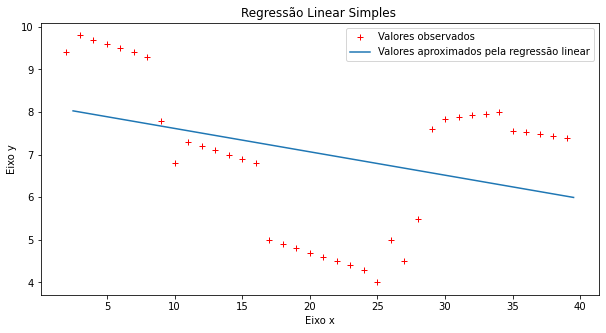

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(x[1: m-1], y[1: m-1],'r+', label='Valores observados')  # Plot some data on the (implicit) axes.
plt.plot(xp[1: m-1], reta_aprox[1: m-1], label='Valores aproximados pela regressão linear')  # etc.
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title("Regressão Linear Simples ")
plt.legend();

## Regressão Linear Múltipla



In [ ]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(nts[['AP1','AP2']] , nts['AP3'])
print(reglin.coef_, reglin.intercept_)

[-0.36608176  1.38338992] -0.8257714929014783


# Comparando duas bases de dados

In [ ]:
def prever_ap3(ap1, ap2):
  ap3 = ap1 * -0.366 + ap2 * 1.383 - 0.825
  return ap3

print(prever_ap3(8,8))
print(prever_ap3(2,4))
print(prever_ap3(3.5,8))
ap1_ap2_futuras = pd.DataFrame({
    'AP1':[8,2,3.5],
    'AP2':[8,4,8]
})
print(ap1_ap2_futuras)
ap3_futuras = reglin.predict(ap1_ap2_futuras)
print("Notas ap3 estimadas pela regressão linear")
print(ap3_futuras)

7.310999999999999
3.9749999999999996
8.958
   AP1  AP2
0  8.0    8
1  2.0    4
2  3.5    8
Notas ap3 estimadas pela regressão linear
[7.31269382 3.97562468 8.96006172]


# Retornando a base de dados "nts"

## Verificando a acurácia da previsão por regressão linear

In [ ]:
ap3_prev = reglin.predict(nts[['AP1','AP2']])
print(ap3_prev)

from sklearn import metrics
rr = metrics.r2_score(nts['AP3'] , ap3_prev)
rr

[ 9.34731014  9.7133919   9.53035102  9.42862021  9.32688939  9.22515857
  9.12342776  9.02169694  5.19714038  4.17983222  4.6884863   4.58675549
  4.48502467  4.38329385  4.28156304  4.17983222  4.46423096  4.36250014
  4.26076933  4.15903851  4.05730769  3.95557688  3.85384606  3.75211524
  3.24346116  4.26076933  3.75211524  4.76942341  9.79432901 10.44941579
 10.41280762 10.37619944 10.33959126 10.30298309  9.83093718  9.86754536
  9.90415353  9.94076171  9.97736989 10.01397806]


0.9818896713333346

In [ ]:
err_quad = metrics.mean_squared_error(nts['AP3'] , ap3_prev) 
err_quad

0.14550924670519022

In [ ]:
import numpy as np
import statsmodels.api as sm

ap1_ap2_ap3 = sm.add_constant(nts[['AP1','AP2','AP3']])
print(ap1_ap2_ap3)

rl = sm.OLS(nts['Final'] , ap1_ap2_ap3).fit()
rl.summary()


    const   AP1   AP2   AP3
0     1.0  10.0  10.0   9.0
1     1.0   9.0  10.0   9.0
2     1.0   9.5  10.0  10.0
3     1.0   9.4   9.9   9.9
4     1.0   9.3   9.8   9.8
5     1.0   9.2   9.7   9.7
6     1.0   9.1   9.6   9.6
7     1.0   9.0   9.5   9.5
8     1.0  10.0   7.0   5.0
9     1.0   9.0   6.0   4.0
10    1.0   9.5   6.5   4.5
11    1.0   9.4   6.4   4.4
12    1.0   9.3   6.3   4.3
13    1.0   9.2   6.2   4.2
14    1.0   9.1   6.1   4.1
15    1.0   9.0   6.0   4.0
16    1.0   5.2   5.2   4.2
17    1.0   5.1   5.1   4.1
18    1.0   5.0   5.0   4.0
19    1.0   4.9   4.9   3.9
20    1.0   4.8   4.8   3.8
21    1.0   4.7   4.7   3.7
22    1.0   4.6   4.6   3.6
23    1.0   4.5   4.5   3.5
24    1.0   4.0   4.0   4.0
25    1.0   5.0   5.0   5.0
26    1.0   4.5   4.5   4.5
27    1.0   5.5   5.5   5.5
28    1.0   5.0   9.0  10.0
29    1.0   5.1   9.5  10.0
30    1.0   5.2   9.5  10.0
31    1.0   5.3   9.5  10.0
32    1.0   5.4   9.5  10.0
33    1.0   5.5   9.5  10.0
34    1.0   4.9   9.

/home/aborba/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.584e+29
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:39:33   Log-Likelihood:                 1215.4
No. Observations:                  40   AIC:                            -2423.
Df Residuals:                      36   BIC:                            -2416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.441e-16   1.22e-14     -0.036      0.971   -2.52e-14    2.43e-14
AP1            0.4000   2.75e-15   1.45e+14      0.000       0.400       0.400
AP2            0.4000   9.41e-15   4.25e+13      0.000       0.400       0.400
AP3            0.2000   6.74e-15   2.97e+13      0.000       0.200       0.200
==============================================================================
Omnibus:                       74.123   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.891
Skew:                           0.098   Prob(JB):                       0.0867
Kurtosis:                       1.298   Cond. No.                         72.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBS: Note que os valores estimados dos pesos são exatamente os pesos usados para calcular a média final

# A correlação entre as notas e a média final

## Gráfico da regressão linear entre a AP2 e AP3

/home/aborba/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


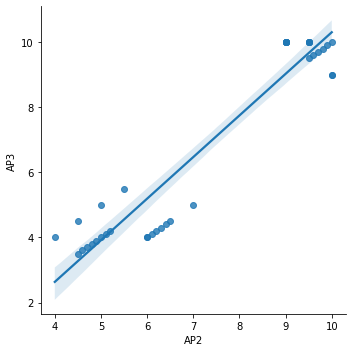

In [ ]:
import seaborn as sns
sns.lmplot('AP2' , 'AP3' , data=nts)


## Correlação entre as notas

In [ ]:
nts.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


## Gráfico de dispersão mostrando a correlação entre os dados de uma base de dados (Base de  dados notas)

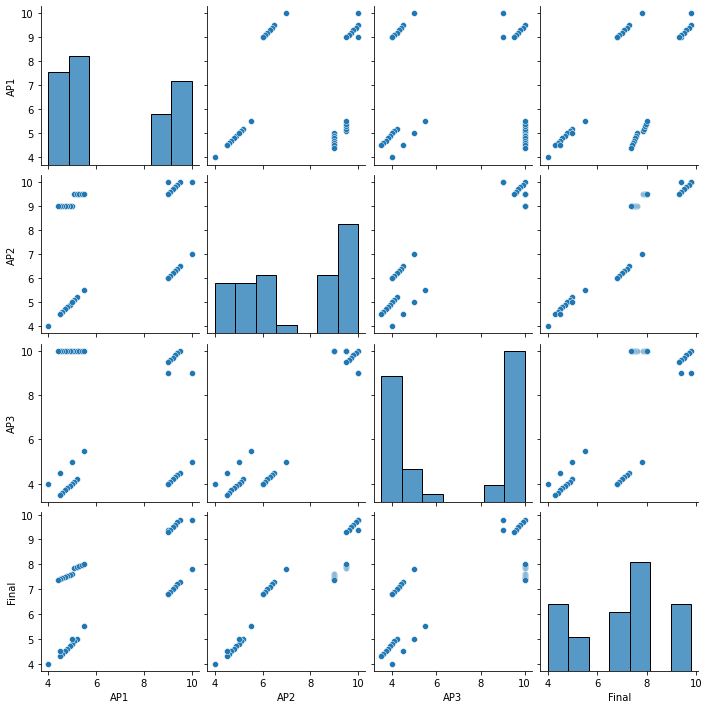

In [ ]:
sns.pairplot(nts)

**[Exercicios] Regressao Linear**


       Date     usd        bov
0  1/2/2020  4.0249  118.57310
1  1/3/2020  4.0668  117.70666
2  1/6/2020  4.0619  116.87792
3  1/7/2020  4.0677  116.66194
4  1/8/2020  4.0644  116.24703
[-0.01783154] 6.303900300544503


/home/aborba/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


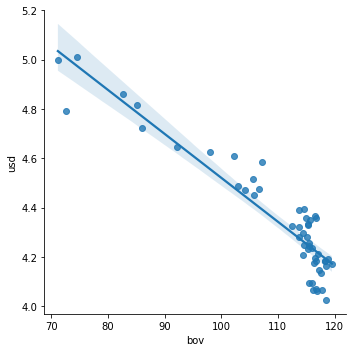

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv')
print(dados.head())

import seaborn as sns
sns.lmplot('bov','usd',data=dados)

from sklearn.linear_model import LinearRegression

rl = LinearRegression()

rl.fit(dados[['bov']] , dados['usd'])
print(rl.coef_,rl.intercept_)

In [ ]:
ibov_fut = pd.DataFrame({'ibov':[110,100,90,80,70,60]})
rl.predict(ibov_fut)

array([4.34243043, 4.52074588, 4.69906132, 4.87737676, 5.0556922 ,
       5.23400765])

# Referência
- Applied Numerical Linear Algebra - Jammes Demmel - Editora SIAM.

- Reconhecimento de padrões - Rogério Negri - Editora Blucher 
